![](https://diariodemadryn.com/wp-content/uploads/2020/02/demand-planning-and-forecasting-1080x675-768x480.jpg)

<a id="intro"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            1. Introduction:
            </span>   
        </font>    
</h2>

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            Introduction:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
           This notebook is to Build a multiple linear regression model for the prediction of demand for shared bikes.<br><br>
        A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.   
    </span>
</p>   
<hr>
<h3>
    <font color = purple >
        <span style='font-family:Georgia'>
            Problem Statement:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
    A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

        .Which variables are significant in predicting the demand for shared bikes.
        .How well those variables describe the bike demands.
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 
</span>
</p>
<hr>
<h3>
    <font color = purple >
        <span style='font-family:Georgia'>
            Business Goal:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
    We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.
    </span>
</p>

    

<a id="libraries"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            2. Getting Jupyter Ready:
            </span>   
        </font>    
</h2>

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.1 Import Python Libraries:
            </span>   
        </font>    
</h3>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns


import itertools
%matplotlib inline

import statsmodels
from statsmodels import api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# setting up plot style 
style.use('seaborn-poster')
style.use('fivethirtyeight')

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.2 Supress Warnings:
            </span>   
        </font>    
</h3>

In [2]:
import warnings
warnings.filterwarnings('ignore')

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.3 Adjust Jupyer Views:
            </span>   
        </font>    
</h3>

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

<a id="import"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            3. Reading & Understanding the data
            </span>   
        </font>    
</h2>

<a id="input"></a>
<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.1 Importing the Boom Bikes dataset
            </span>   
        </font>    
</h3>

In [4]:
BikesDF = pd.read_csv('day.csv')

<a id="input"></a>
<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.2   Print-out top 5 rows and bottom 5 rows
            </span>   
        </font>    
</h3>

In [5]:
BikesDF.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
BikesDF.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


<a id="inspect"></a>
<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.3 Inspect Bikes Data Frame
            </span>   
        </font>    
</h3>

In [7]:
# Dataset dimension
print("Dataset dimension - BikesDF     :",BikesDF.shape)

#Dataset size
print("Dataset size - BikesDF          :",BikesDF.size)



Dataset dimension - BikesDF     : (730, 16)
Dataset size - BikesDF          : 11680


In [8]:
# Summarizing the Bikes Data Frame

BikesDF.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Boom Bikes Data Frame doesn't contain any of the miss-allignment/missing data columns.<br>
        Out of 16 columns of Boom Bikes Data Frame, 'dteday' column is an object datatype and rest all are numeric datatype.
    </span>    
</div>

In [9]:
# statastical summary of the Bikes Data Frame

BikesDF.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
df = BikesDF[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]

df.apply(pd.Series.value_counts).fillna(0).astype(int)

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,0,365,0,709,105,231,0
1,180,365,62,21,105,499,463
2,184,0,56,0,104,0,246
3,188,0,62,0,103,0,21
4,178,0,60,0,104,0,0
5,0,0,62,0,104,0,0
6,0,0,60,0,105,0,0
7,0,0,62,0,0,0,0
8,0,0,62,0,0,0,0
9,0,0,60,0,0,0,0


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Categorical columns Mnth, season, weekday, weathersit holds more number of categories.  </b><br> Remaining categorical columns yr, holiday, workingday holds 2 categories.
    </span>    
</div>

<a id="clean"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            4. Data Cleaning & Manipulation
            </span>   
        </font>    
</h2>

<a id="null"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.1 Duplicate check
            </span>   
        </font>    
</h3>

In [11]:
BikesDF.duplicated().sum()

0

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Boom Bikes Data Frame doesn't contain duplicate records.
    </span>    
</div>

<a id="null"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.2 Missing/Null Value Calculation
            </span>   
        </font>    
</h3>

In [12]:
BikesDF.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Boom Bikes Data Frame doesn't contain any null values.
    </span>    
</div>

<a id="null"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.3 Analyze & Deleting redundant Columns from Boom Bikes Data Frame 
            </span>   
        </font>    
</h3>

<function matplotlib.pyplot.show(close=None, block=None)>

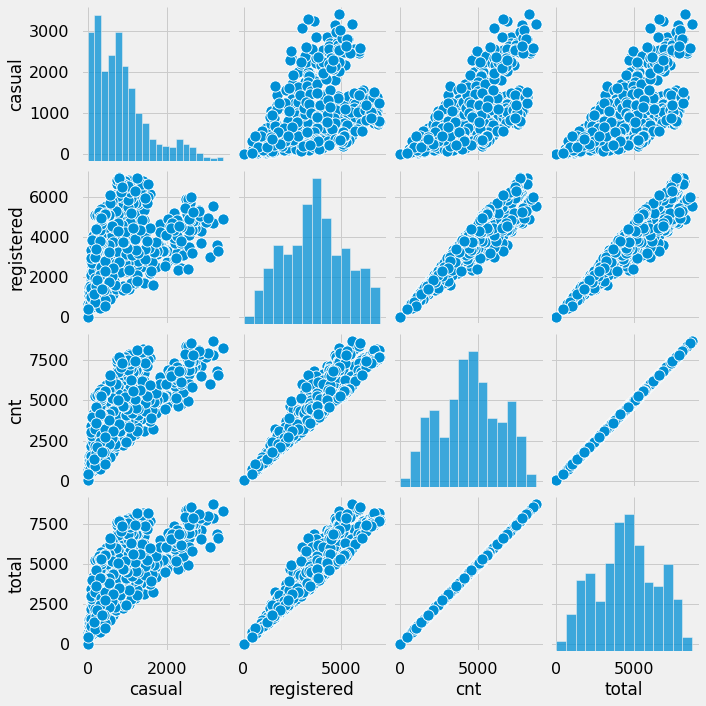

In [13]:
# Checking the relationship between casual, registered and cnt column
feature_rel = BikesDF[['casual','registered','cnt']]
# Creating a column whch will show the value of casual + registered
feature_rel['total'] = feature_rel['casual'] + feature_rel['registered']
sns.pairplot(feature_rel)
plt.show

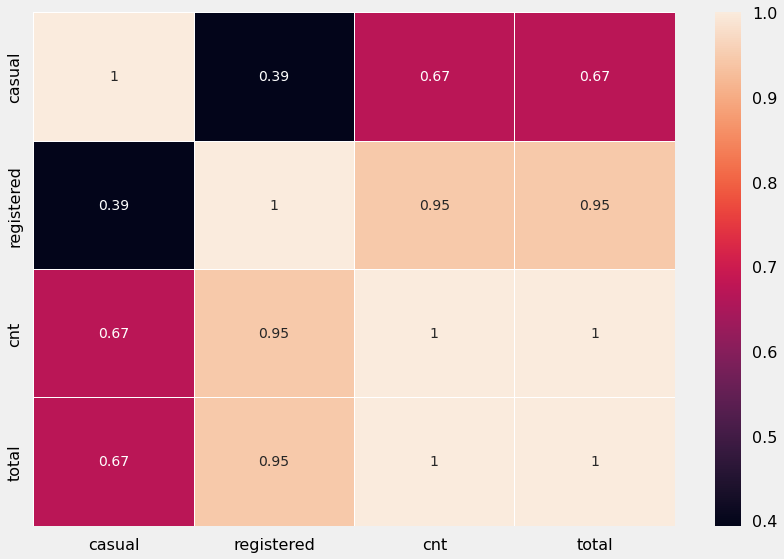

In [14]:
# plotting the correlation metrics to identify the percentage of collinearity between total and cnt variables
sns.heatmap(feature_rel.corr(), annot=True, linewidth = 1)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Features casual & registered contains the count of bikes booked by the different categories of customers. For In-depth analysis, feature named total is introduced by the summation of both casual & registered category which results the exact values as feature cnt. Here the taget feature cnt contains total number of Boom bikes users so we can ignore both  casual and registered features.
    </span>    
</div>

In [15]:
# Boom Bikes data set has below identified redundant columns 
''' instant - col represents the index 
    dteday  - date of the year 2018/2019
    casual  - no of customers booked Boom Bikes casually
    registered - no of customers pre-registered Boom Bikes '''

red_cols = ['instant', 'dteday', 'casual', 'registered']
BikesDF.drop(red_cols, axis = 1, inplace = True)

In [16]:
# Re-checking the count of rows and columns of Boom Bikes Data Frame after deleting redundant columns.
BikesDF.shape

(730, 12)

<a id="null"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.4 Converting categorical features into category data type. 
            </span>   
        </font>    
</h3>

In [17]:
# listing the categorical columns
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# listing the numeric columns
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# converting dtype to categorical
BikesDF[cat_cols] = BikesDF[cat_cols].astype('category')
BikesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


In [18]:
# summary of the categorical columns
BikesDF.describe(include = 'category')

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,730,730,730,730,730,730,730
unique,4,2,12,2,7,2,3
top,3,0,1,0,0,1,1
freq,188,365,62,709,105,499,463


In [19]:
# Percentage of values for each month
BikesDF.mnth.value_counts(normalize=True, sort = False)

1     0.084932
2     0.076712
3     0.084932
4     0.082192
5     0.084932
6     0.082192
7     0.084932
8     0.084932
9     0.082192
10    0.084932
11    0.082192
12    0.084932
Name: mnth, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Here the percentage values are related to the number of days in month and dataset contains the Boom Bikes customers for all days of the years 2018 & 2019 .     </span>    
</div>

In [20]:
# Percentage of values for each season
BikesDF.season.value_counts(normalize=True, sort = False)

1    0.246575
2    0.252055
3    0.257534
4    0.243836
Name: season, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Here the percentage values are related to the seasons based on the month.      </span>    
</div>

In [21]:
# Percentage of values for holiday
BikesDF.holiday.value_counts(normalize=True)

0    0.971233
1    0.028767
Name: holiday, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Boom Bikes are used by customers during non-holidays which is vectorized as 0   </span>    
</div>

In [22]:
# percentage of values for weekday
BikesDF.weekday.value_counts(normalize=True)

0    0.143836
1    0.143836
6    0.143836
2    0.142466
4    0.142466
5    0.142466
3    0.141096
Name: weekday, dtype: float64

In [23]:
# Percentage of values for workingday
BikesDF.workingday.value_counts(normalize=True)

1    0.683562
0    0.316438
Name: workingday, dtype: float64

<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.5 Fixing Rows and Columns. 
            </span>   
        </font>    
</h3>

In [24]:
# Mapped the categorical columns with description

BikesDF['season'] = BikesDF['season'].map({1:'spring', 2:'Summer', 3:'Fall', 4:'Winter'})

BikesDF['yr'] = BikesDF['yr'].map({0 : '2018', 1: '2019'})
                            
BikesDF['mnth'] = BikesDF['mnth'].map({1 : 'Jan', 2: ' Feb', 3: 'Mar', 4 : 'Apr', 5: 'May', 6 : 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
                            
BikesDF['weathersit'] = BikesDF['weathersit'].map({1: 'Clear_FewClouds', 2: 'Mist_Cloudy', 3: 'LightSnow_LightRain', 4: 'HeavyRain_IcePallets'})
                            

<a id="clean"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            5. Data Visualization
            </span>   
        </font>    
</h2>

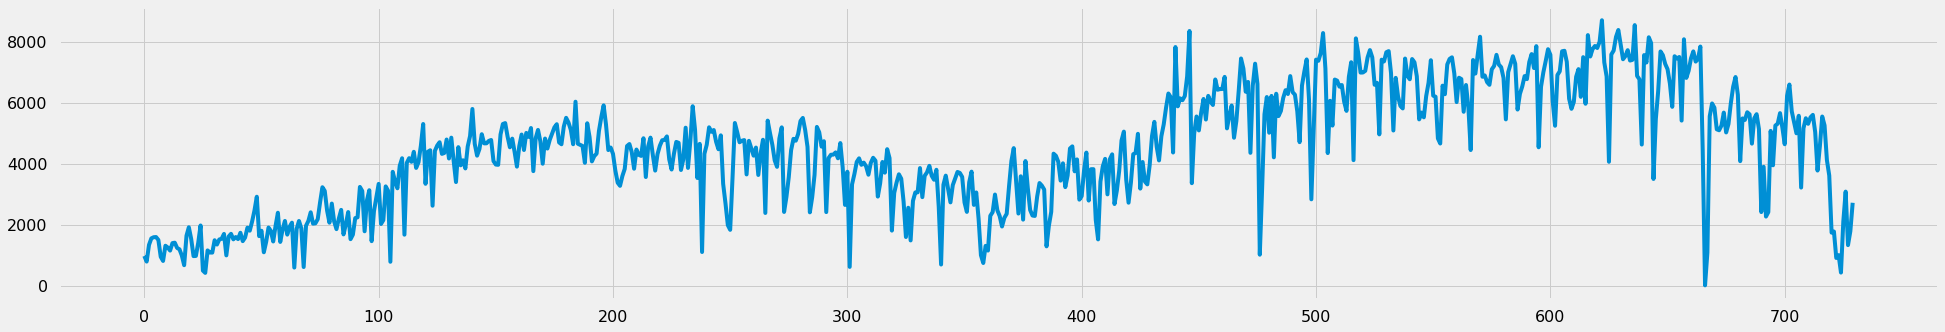

In [25]:
# plotting the target variable
plt.figure(figsize = (30,5))
plt.plot(BikesDF['cnt'])
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Target variable 'cnt' is plotted for both the years 2018 and 2019.<br> Visuals are pretty clear that after the 1st quarter of 2019, number of Boom Bike customers are increased. At the end of 2019, we can observe sudden fall of customers due to covid lockdown initiation  </span>    
</div>

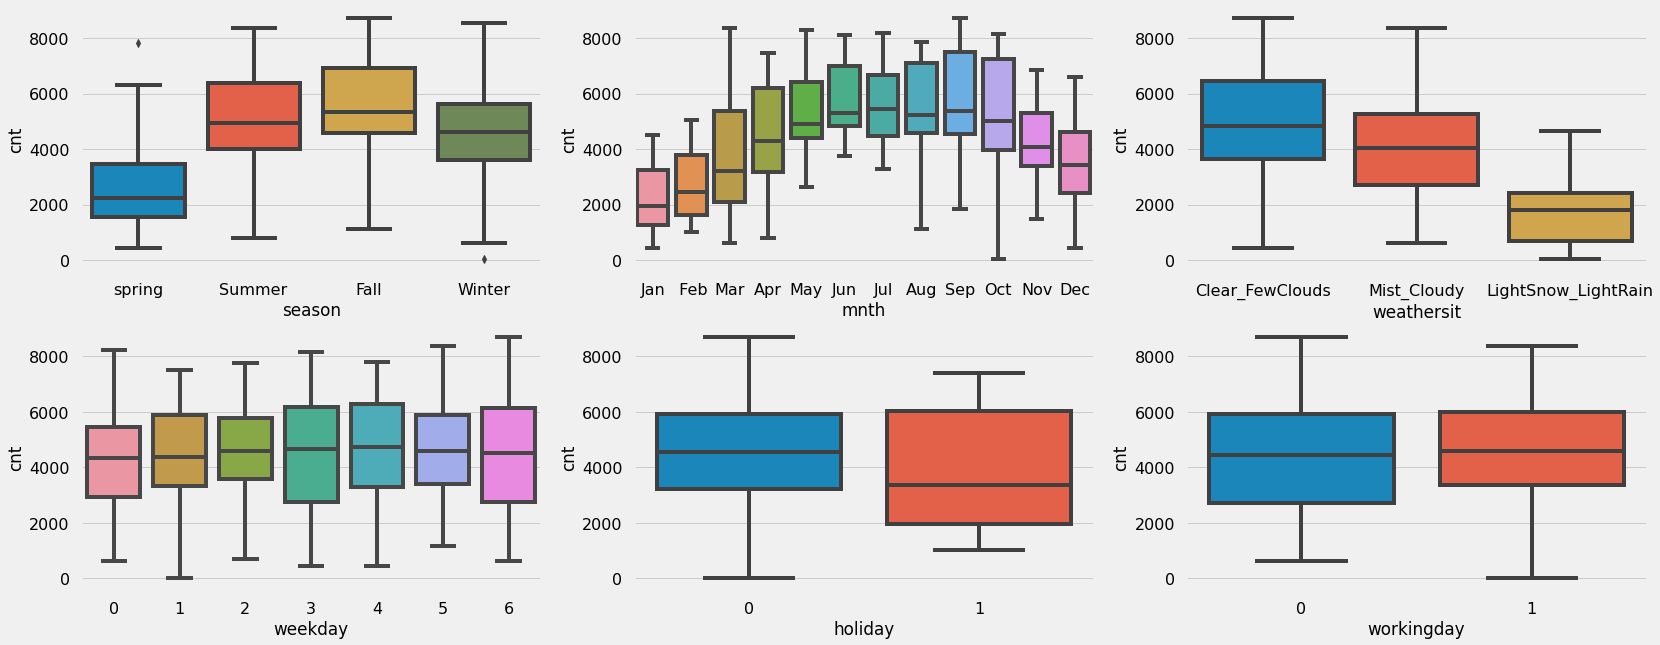

In [26]:
''' Boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
to see how each of the predictor variable stackup against the target variable. ''' 

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = BikesDF)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = BikesDF)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BikesDF)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = BikesDF)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = BikesDF)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = BikesDF)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Number of customers for Boom Bikes are recorded high in the season of Summer & Fall where the weather situations are Clear_FewClouds and Mist_Cloudy.<br> We can clearly observe that Boom Bikes are less used during the holiday and has demand in all the days of the week in both the Summer and Fall Season.  
    </span>    
</div>

In [27]:
def categorical_stats(col):
    cat_df = BikesDF.groupby(col)['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/BikesDF.cnt.sum()*100
    cat_df['count_perc']=cat_df['count']/BikesDF.cnt.count()*100
    return round(cat_df,2)

In [28]:
def categorical_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=BikesDF)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data= BikesDF, hue='yr',palette='Paired')
    plt.legend(labels=['2018', '2019'])
    return


            sum     mean  count  sum_perc  count_perc
season                                               
Fall    1061129  5644.30    188     32.24       25.75
Summer   918589  4992.33    184     27.91       25.21
Winter   841613  4728.16    178     25.57       24.38
spring   469514  2608.41    180     14.27       24.66


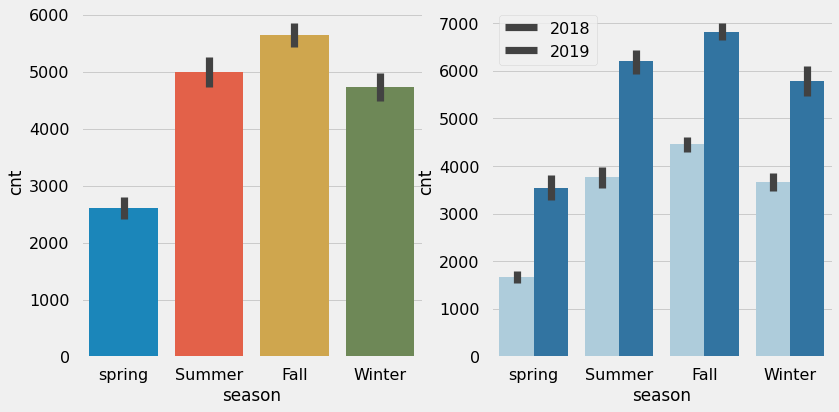

In [29]:
print(categorical_stats('season'))
categorical_plot('season',12,6)

          sum     mean  count  sum_perc  count_perc
yr                                                 
2019  2047742  5610.25    365     62.23        50.0
2018  1243103  3405.76    365     37.77        50.0


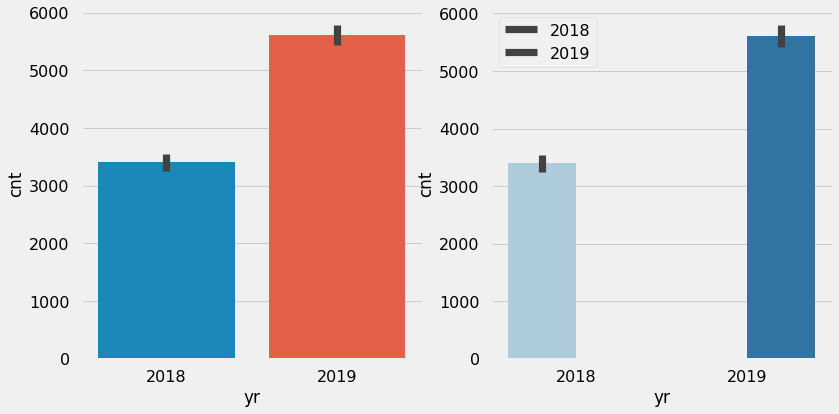

In [30]:
print(categorical_stats('yr'))
categorical_plot('yr',12,6)

         sum     mean  count  sum_perc  count_perc
mnth                                              
Aug   351194  5664.42     62     10.67        8.49
Jun   346342  5772.37     60     10.52        8.22
Sep   345991  5766.52     60     10.51        8.22
Jul   344948  5563.68     62     10.48        8.49
May   331686  5349.77     62     10.08        8.49
Oct   322352  5199.23     62      9.80        8.49
Apr   269094  4484.90     60      8.18        8.22
Nov   254831  4247.18     60      7.74        8.22
Mar   228920  3692.26     62      6.96        8.49
Dec   211036  3403.81     62      6.41        8.49
 Feb  149518  2669.96     56      4.54        7.67
Jan   134933  2176.34     62      4.10        8.49


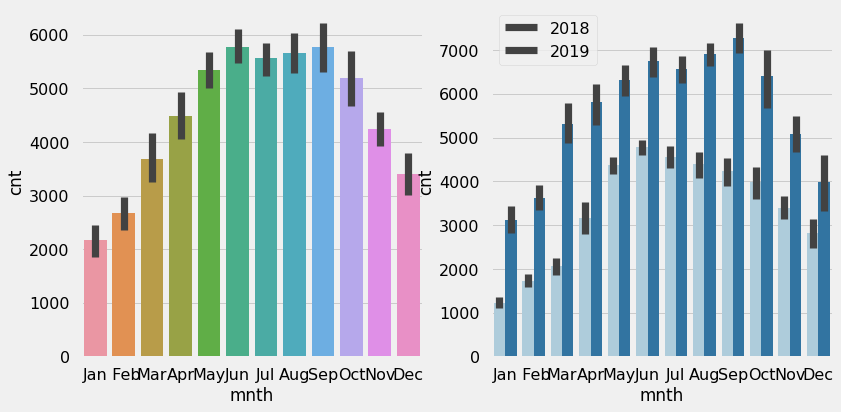

In [31]:
print(categorical_stats('mnth'))
categorical_plot('mnth',12,6)


            sum     mean  count  sum_perc  count_perc
weekday                                              
5        487790  4690.29    104     14.82       14.25
4        485395  4667.26    104     14.75       14.25
6        477807  4550.54    105     14.52       14.38
3        471214  4574.89    103     14.32       14.11
2        469109  4510.66    104     14.25       14.25
1        455503  4338.12    105     13.84       14.38
0        444027  4228.83    105     13.49       14.38


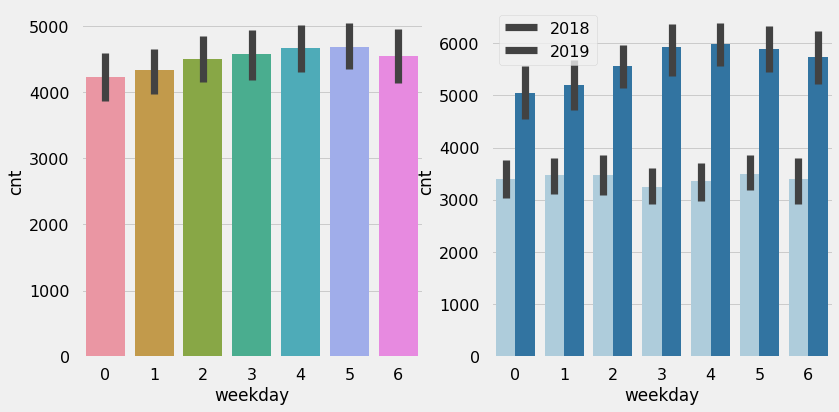

In [32]:
print(categorical_stats('weekday'))
categorical_plot('weekday',12,6)

                sum     mean  count  sum_perc  count_perc
workingday                                               
1           2290576  4590.33    499      69.6       68.36
0           1000269  4330.17    231      30.4       31.64


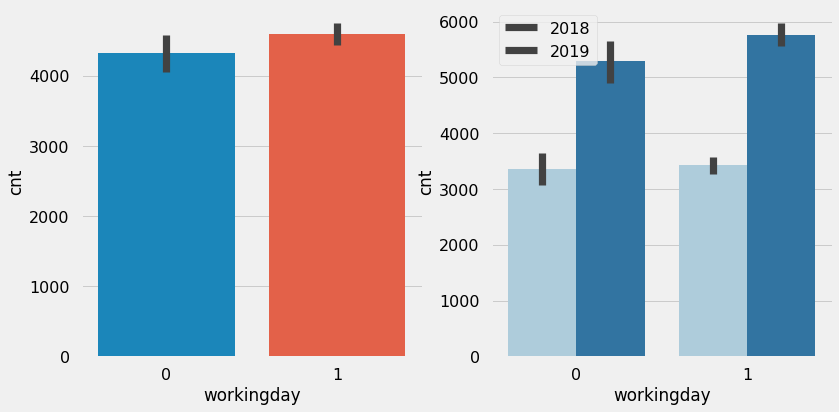

In [33]:
print(categorical_stats('workingday'))
categorical_plot('workingday',12,6)

             sum    mean  count  sum_perc  count_perc
holiday                                              
0        3212410  4530.9    709     97.62       97.12
1          78435  3735.0     21      2.38        2.88


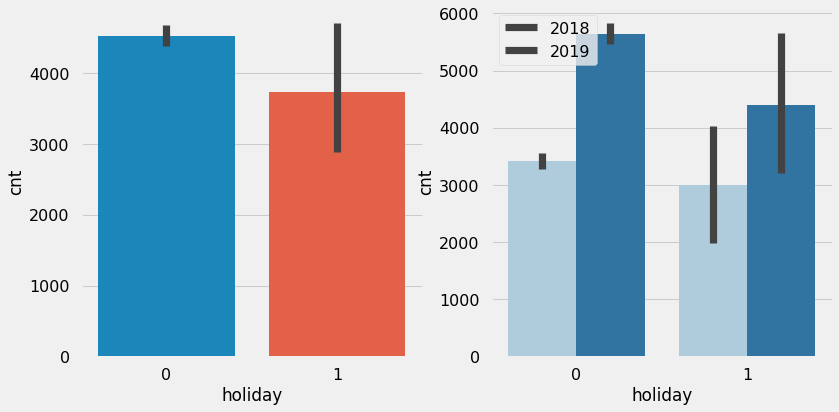

In [34]:
print(categorical_stats('holiday'))
categorical_plot('holiday',12,6)

                         sum     mean  count  sum_perc  count_perc
weathersit                                                        
Clear_FewClouds      2257952  4876.79    463     68.61       63.42
Mist_Cloudy           995024  4044.81    246     30.24       33.70
LightSnow_LightRain    37869  1803.29     21      1.15        2.88


(array([0, 1, 2]),
 [Text(0, 0, 'Clear_FewClouds'),
  Text(1, 0, 'Mist_Cloudy'),
  Text(2, 0, 'LightSnow_LightRain')])

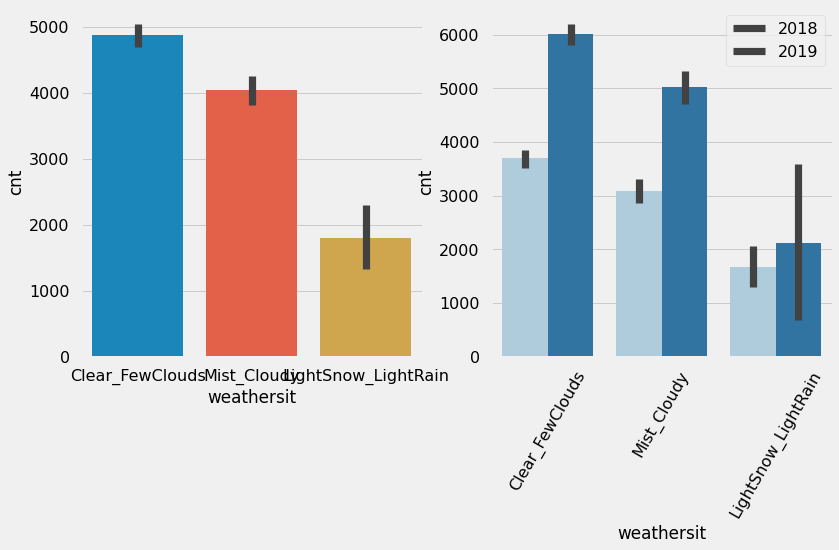

In [35]:
print(categorical_stats('weathersit'))
categorical_plot('weathersit',12,6)
plt.xticks(rotation=60)

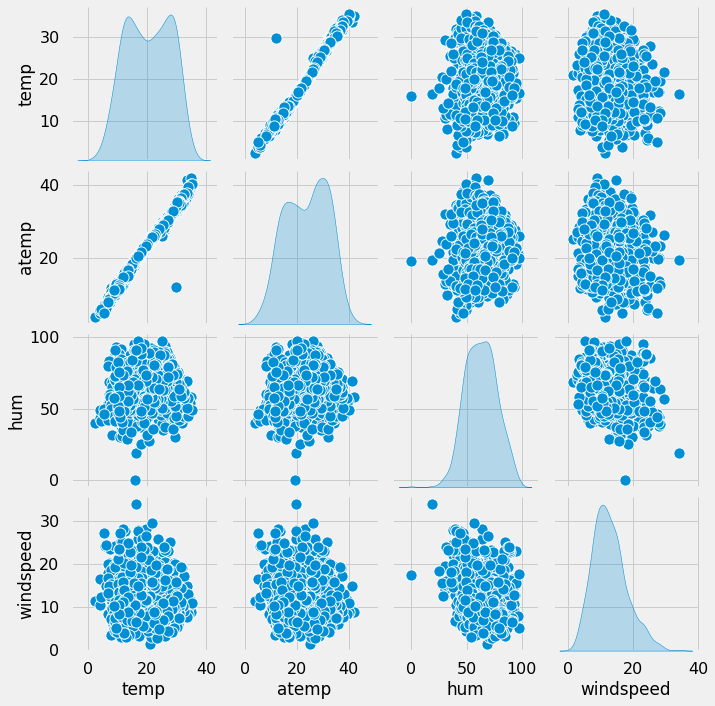

In [36]:
# Bivariate Analysis on numerical cols

sns.pairplot(BikesDF.select_dtypes(['float64']), diag_kind = 'kde')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Features 'temp' and 'atemp' are linear.
    </span>    
</div>

<AxesSubplot:>

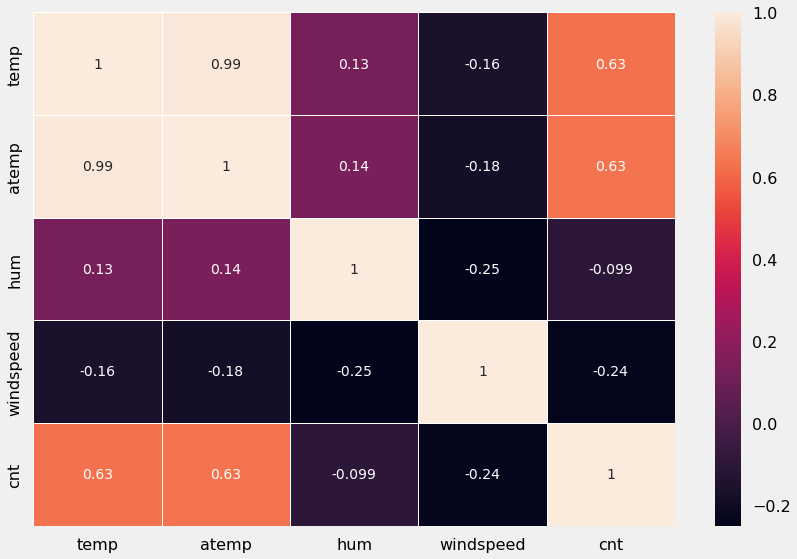

In [37]:
corr = BikesDF[num_cols].corr()
sns.heatmap(corr, annot = True, linewidth = 1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> The features 'temp' and 'atemp' are pretty linearly related and occurrence of high intercorrelations among independent variables(Multicollinearity) will lead to skewed or misleading results.<br> So, we can drop 'temp' feature before training the model
    </span>
</div>

<Figure size 1584x216 with 0 Axes>

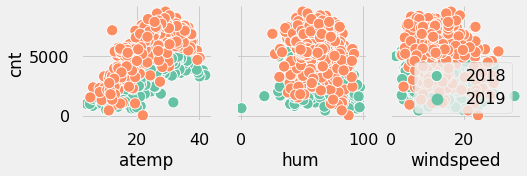

In [38]:
plt.figure(figsize = (22,3))
ax = sns.pairplot(data = BikesDF, x_vars = ['atemp', 'hum', 'windspeed'], y_vars = 'cnt', hue = 'yr', palette='Set2')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Pairplot is plotted for all numeric predictor variables against target variable 'cnt' for both the years 2018 and 2019.<br> All the predictor variables have increased values in 2019 compared to 2018. So, variable 'yr' will be a key parameter in the model        
    </span>
</div>

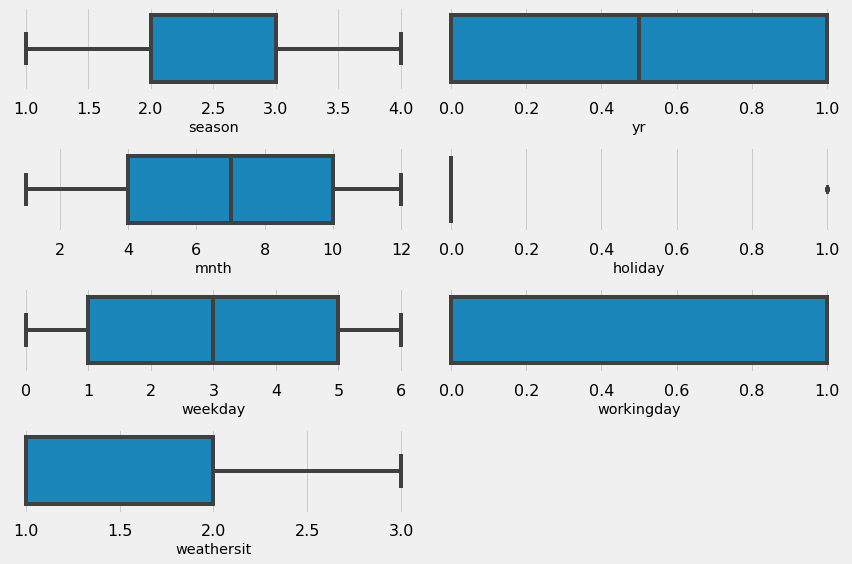

In [39]:
var = df.select_dtypes(exclude = 'category').columns

# Box plot
col = 2
row = len(var)//col+1

plt.figure(figsize=(12,8))
plt.rc('font', size=12)
for i in list(enumerate(var)):
    plt.subplot(row, col, i[0]+1)
    sns.boxplot(df[i[1]])    
plt.tight_layout()   
plt.show()

<a id="outlier"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             5.1 Identifying the outliers
            </span>   
        </font>    
</h3>

<Figure size 864x576 with 0 Axes>

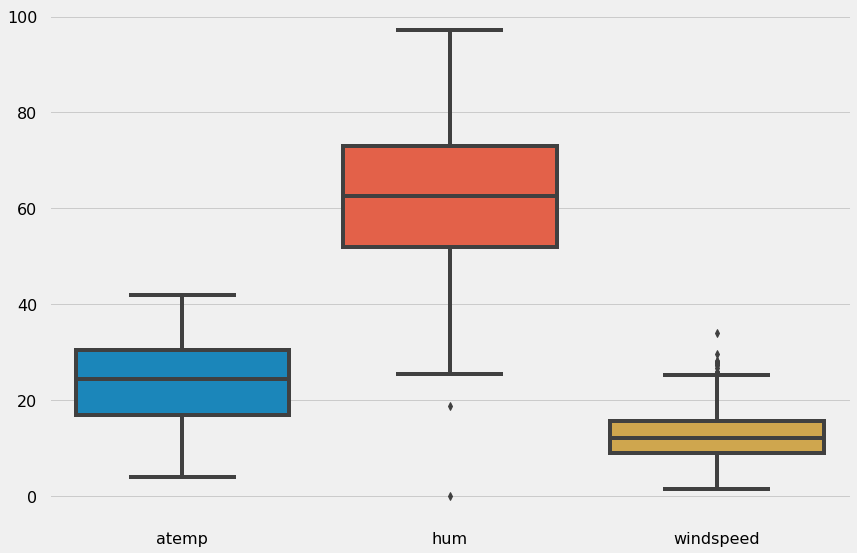

<Figure size 864x576 with 0 Axes>

In [40]:
# Visualizing numeric variables
sns.boxplot(data = BikesDF[['atemp', 'hum', 'windspeed']])

plt.figure(figsize = (12, 8))

In [41]:
# percentage of outliers

def perc_outliers(x):
    IQR = BikesDF[x].quantile(0.75) - BikesDF[x].quantile(0.25)
    UQR = BikesDF[x].quantile(0.75)+ IQR*1.5
    LQR = BikesDF[x].quantile(0.25)- IQR*1.5
    per_outlier = round(((BikesDF[x]<LQR).sum()+(BikesDF[x]>UQR).sum())/len(BikesDF[x])*100, 2)
    return per_outlier
print('Percentage of outliers for atemp : ', perc_outliers('atemp'))
print('percentage of outliers for hum : ', perc_outliers('hum'))
print('percentage of outliers for windspeed : ', perc_outliers('windspeed'))
    

Percentage of outliers for atemp :  0.0
percentage of outliers for hum :  0.27
percentage of outliers for windspeed :  1.78


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> For all the numeric predictor variables, there is a lesser amount of outliers which can be ignored.
    </span>
</div>

In [42]:
BikesDF.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'], dtype='object')

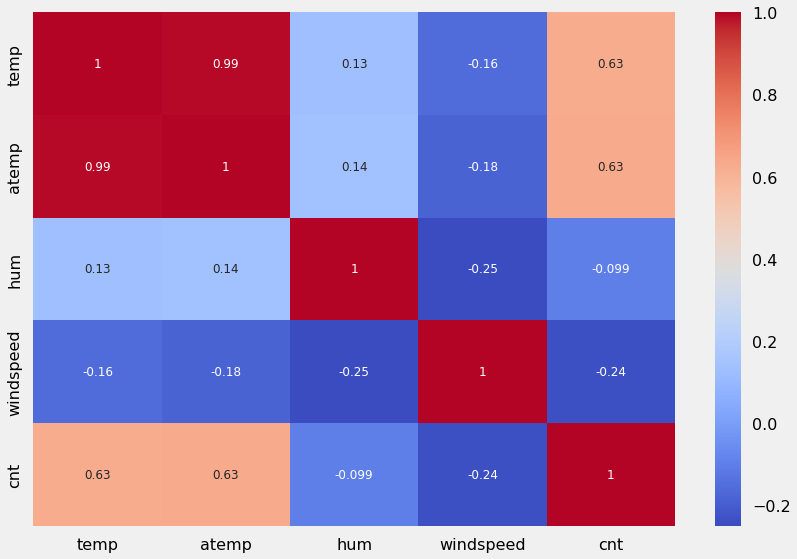

In [43]:
sns.heatmap(BikesDF.corr(), annot=True, cmap='coolwarm')
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> The feature 'atemp' has positive correlation with target variable 'cnt' which we should use as a predictor to build a model and remaining numeric variable can drop after calculating VIF value if the variable has the value of >5.
    </span>
</div>

<a id="stdval"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             5.2 Data Preparation
            </span>   
        </font>    
</h3>

In [44]:
# get dummy variables  encoding for season, weekday, mnth and weathersit
dummy_vars = pd.get_dummies(BikesDF[['season','weekday','mnth','weathersit']],drop_first=True)

# concat the dummy df with original df
BikesDF = pd.concat([BikesDF,dummy_vars], axis = 1)

# drop season column
BikesDF.drop(['season','weekday','mnth','weathersit'], axis=1, inplace=True)

BikesDF.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Summer,season_Fall,season_Winter,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,mnth_ Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
BikesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   yr                              730 non-null    category
 1   holiday                         730 non-null    category
 2   workingday                      730 non-null    category
 3   temp                            730 non-null    float64 
 4   atemp                           730 non-null    float64 
 5   hum                             730 non-null    float64 
 6   windspeed                       730 non-null    float64 
 7   cnt                             730 non-null    int64   
 8   season_Summer                   730 non-null    uint8   
 9   season_Fall                     730 non-null    uint8   
 10  season_Winter                   730 non-null    uint8   
 11  weekday_1                       730 non-null    uint8   
 12  weekday_2             

<AxesSubplot:>

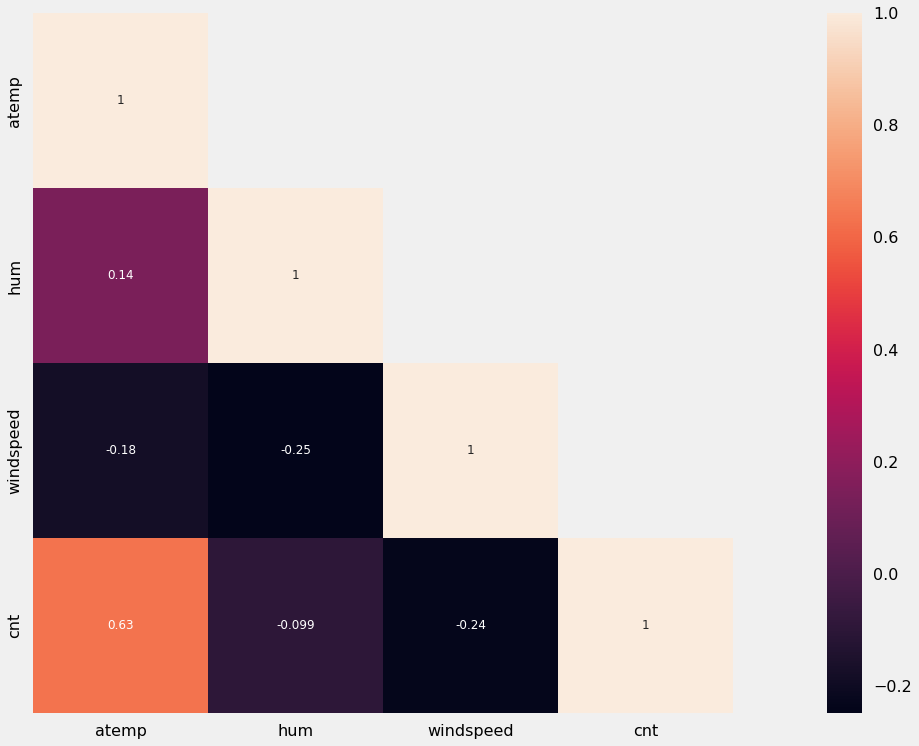

In [46]:
data = BikesDF[['holiday', 'workingday',  'atemp', 'hum', 'windspeed', 'cnt']]

cor_mat= data[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [47]:
BikesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   yr                              730 non-null    category
 1   holiday                         730 non-null    category
 2   workingday                      730 non-null    category
 3   temp                            730 non-null    float64 
 4   atemp                           730 non-null    float64 
 5   hum                             730 non-null    float64 
 6   windspeed                       730 non-null    float64 
 7   cnt                             730 non-null    int64   
 8   season_Summer                   730 non-null    uint8   
 9   season_Fall                     730 non-null    uint8   
 10  season_Winter                   730 non-null    uint8   
 11  weekday_1                       730 non-null    uint8   
 12  weekday_2             

In [48]:
# Convert categorical columns to numeric 
BikesDF[['yr','holiday','workingday']]= df[['yr','holiday','workingday']].astype('uint8')
BikesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              730 non-null    uint8  
 1   holiday                         730 non-null    uint8  
 2   workingday                      730 non-null    uint8  
 3   temp                            730 non-null    float64
 4   atemp                           730 non-null    float64
 5   hum                             730 non-null    float64
 6   windspeed                       730 non-null    float64
 7   cnt                             730 non-null    int64  
 8   season_Summer                   730 non-null    uint8  
 9   season_Fall                     730 non-null    uint8  
 10  season_Winter                   730 non-null    uint8  
 11  weekday_1                       730 non-null    uint8  
 12  weekday_2                       730 

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> All the 29 variables are in numerical data type and we can start splitting the data and train the model on the train data set.
    </span>
</div>

<a id="clean"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            6. Model Building
            </span>   
        </font>    
</h2>

<a id="stdval"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             6.1 Splitting the data into Train and Test dataset
            </span>   
        </font>    
</h3>

In [49]:
# Splitting the data into 70:30 ratio
np.random.seed(0)
X_train, X_test = train_test_split(BikesDF,train_size =0.7, random_state = 100)

In [50]:
# Inspecting train and test dataset

print(" Train Dataset dimension     :",X_train.shape)


print(" Test Dataset dimension          :",X_test.shape)

 Train Dataset dimension     : (510, 30)
 Test Dataset dimension          : (220, 30)


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Based on the 70% - 30% split between train and test dataset we have 510 rows in train dataset and 220 in test dataset
    </span>
</div>


In [51]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Summer,season_Fall,season_Winter,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,mnth_ Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


<a id="stdval"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             6.2 Data rescalling :<br><br> Min-max-scaler  (normalization:(X-xmin)/(Xmax - Xmin)) -->  Between 0 & 1<br><br>
            </span>   
        </font>    
</h3>  

In [52]:
scaler = MinMaxScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [53]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Summer,season_Fall,season_Winter,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,mnth_ Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
            <b>Insight: </b><br> MinMaxScaler estimator scales and translates each feature individually between the values 0 & 1.
    </span>
</div>

In [54]:
X_train[num_cols].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


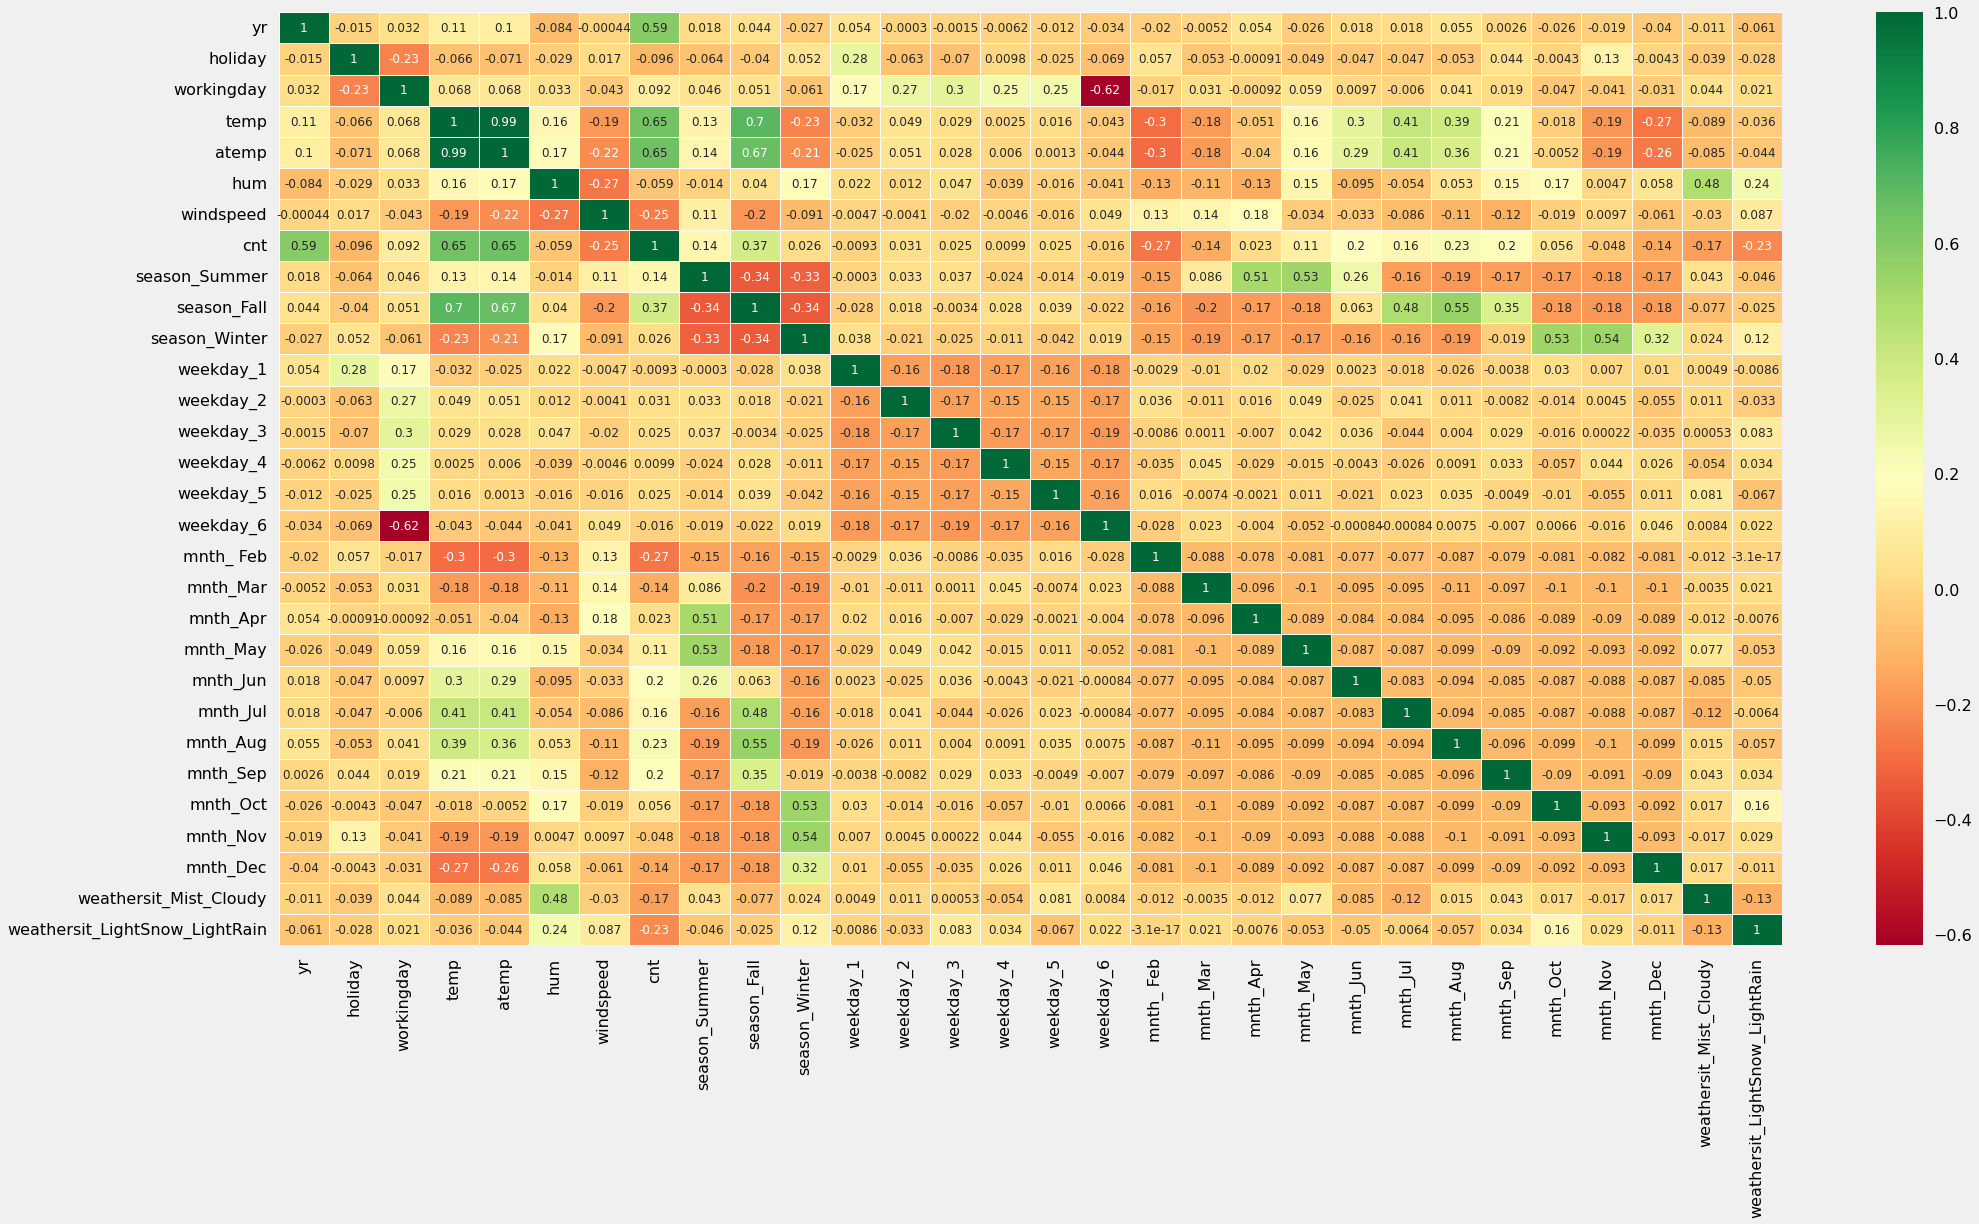

In [55]:
plt.figure(figsize = (30,16))
sns.heatmap(X_train.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
            <b>Insight: </b><br>
        There is multi-colinearity between the variables. We need to consider the factors when developing the model.<br>


Spring is negatively correlated with cnt<br>
misty weather and humidity has correlation<br>
various months and corresponding weather has correlation<br>
    </span>
</div>








<a id="stdval"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             6.3 Building the linear model
            </span>   
        </font>    
</h3>

In [56]:
# extracting the target variable from trained dataset

y_train = X_train.pop('cnt')

In [57]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Summer,season_Fall,season_Winter,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,mnth_ Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
            <b>Insight: </b><br> Target variable is moved from X_train to y_train variable.
    </span>
</div>

In [58]:
#Fitting the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [59]:
# Running RFE
rfe = RFE(lm, 15)

In [60]:
rfe = rfe.fit(X_train, y_train)

In [61]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Summer', True, 1),
 ('season_Fall', True, 1),
 ('season_Winter', True, 1),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('mnth_ Feb', False, 7),
 ('mnth_Mar', False, 2),
 ('mnth_Apr', False, 4),
 ('mnth_May', False, 3),
 ('mnth_Jun', False, 5),
 ('mnth_Jul', False, 8),
 ('mnth_Aug', True, 1),
 ('mnth_Sep', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Nov', False, 9),
 ('mnth_Dec', False, 10),
 ('weathersit_Mist_Cloudy', True, 1),
 ('weathersit_LightSnow_LightRain', True, 1)]

In [62]:
# storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_Summer', 'season_Fall', 'season_Winter', 'weekday_6', 'mnth_Aug', 'mnth_Sep', 'mnth_Oct', 'weathersit_Mist_Cloudy', 'weathersit_LightSnow_LightRain'], dtype='object')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
            <b>Insight: </b><br> RFE is an feature selection algorithm. Out of 29 predictor varibles, 15 variables are slecected from the train data set that are most relevant in predicting the target variable.
    </span>
</div>

In [63]:
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]

Index(['atemp', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'mnth_ Feb', 'mnth_Mar', 'mnth_Apr', 'mnth_May', 'mnth_Jun', 'mnth_Jul', 'mnth_Nov', 'mnth_Dec'], dtype='object')

<a id="stdval"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             6.4 Building the stats model for detailed statstics
            </span>   
        </font>    
</h3>

In [64]:
# Creating X_train_rfe with RFE selected variables
X_train_rfe = X_train[col]

In [65]:
# create function for stats linear model 
def sm_linearmodel(X_train_sm):
    #Adding constant
    X_train_sm = sm.add_constant(X_train_sm)

    # create a fitted model (1st model)
    lm = sm.OLS(y_train,X_train_sm).fit()
    return lm

In [66]:
# Function to calculate VIF
# calculate VIF
def vif_calc(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

In [67]:
# Create 1st stats model and check for summary and VIF
lm_1 = sm_linearmodel(X_train_rfe)
print(lm_1.summary())

# Calculate VIF
print(vif_calc(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          5.17e-191
Time:                        00:56:46   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
            <b>Insight: </b><br> Features 'atemp' has high VIF, but it is the most imp feature that is available to predict the target variable which we found during the analysis phase. So we can't drop the 'atemp' feature.<br>
        The feature 'holiday' has high p-value (0.064) which should be dropped from the train data set.
    </span>
</div>

In [68]:
# drop holiday feature with high p value
X_train_rfe = X_train_rfe.drop(['holiday'], axis = 1)
lm_1 = sm_linearmodel(X_train_rfe)
   

In [69]:

print(lm_1.summary())

# Calculate VIF
print(vif_calc(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.5
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          2.77e-191
Time:                        00:56:46   Log-Likelihood:                 517.33
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
            <b>Insight: </b><br> The feature 'hum' has high VIF(17.27) which should be dropped from the train data set.
    </span>
</div>

In [70]:
# hum feature has VIF as >10 which an association with other features weathersit_Mist_Cloudy so we should drop hum feature and re-build the model

# drop variable with high VIF value
X_train_rfe = X_train_rfe.drop(['hum'], axis = 1)
lm_2 = sm_linearmodel(X_train_rfe)


In [71]:
print(lm_2.summary())

# Calculate VIF
print(vif_calc(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          1.95e-188
Time:                        00:56:46   Log-Likelihood:                 507.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     496   BIC:                            -928.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
            <b>Insight: </b><br> The feature 'Season_Fall' has high VIF(7.27) which should be dropped from the train data set.
    </span>
</div>

In [72]:
# Season-Fall feature has high VIF. So we should remove Season-fall feature


# drop variable with high VIF value
X_train_rfe = X_train_rfe.drop(['season_Fall'], axis = 1)
lm_3 = sm_linearmodel(X_train_rfe)

In [73]:
print(lm_3.summary())

# Calculate VIF
print(vif_calc(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          9.00e-189
Time:                        00:56:46   Log-Likelihood:                 505.77
No. Observations:                 510   AIC:                            -985.5
Df Residuals:                     497   BIC:                            -930.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [74]:
# workingday feature has high VIF. So we should remove workingday feature


# drop variable with high VIF value
X_train_rfe = X_train_rfe.drop(['workingday'], axis = 1)
lm_4 = sm_linearmodel(X_train_rfe)

In [75]:
print(lm_4.summary())

# Calculate VIF
print(vif_calc(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.6
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          1.14e-184
Time:                        00:56:46   Log-Likelihood:                 493.23
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     498   BIC:                            -911.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [76]:
# mnth_oct feature has high VIF. So we should remove mnth_oct feature


# drop variable with high VIF value
X_train_rfe = X_train_rfe.drop(['mnth_Oct'], axis = 1)
lm_5 = sm_linearmodel(X_train_rfe)

In [77]:
print(lm_5.summary())

# Calculate VIF
print(vif_calc(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.6
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          3.60e-185
Time:                        00:56:46   Log-Likelihood:                 491.56
No. Observations:                 510   AIC:                            -961.1
Df Residuals:                     499   BIC:                            -914.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [78]:
# weekday_6 feature has high VIF. So we should remove weekday_6 feature


# drop variable with high VIF value
X_train_rfe = X_train_rfe.drop(['weekday_6'], axis = 1)
lm_6 = sm_linearmodel(X_train_rfe)
print(lm_6.summary())

# Calculate VIF
print(vif_calc(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     269.9
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          1.26e-185
Time:                        00:56:46   Log-Likelihood:                 489.74
No. Observations:                 510   AIC:                            -959.5
Df Residuals:                     500   BIC:                            -917.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
            <b>Insight: </b><br> Finally the model looks good without any multi collinearity between predictor variables and p-vales are less than the threshold value(<0.5).<br> So, We will consider this  as our final model to apply on the test data.
    </span>
</div>

In [79]:
# List down final model varibales and its coefficients

# assign final model to lm_final
lm_final = lm_6

# list down and check variables of final model
var_final = list(lm_final.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,3))

Final Selected Variables: ['yr', 'temp', 'windspeed', 'season_Summer', 'season_Winter', 'mnth_Aug', 'mnth_Sep', 'weathersit_Mist_Cloudy', 'weathersit_LightSnow_LightRain']

Coefficent for the variables are:
const                             0.126
yr                                0.233
temp                              0.521
windspeed                        -0.152
season_Summer                     0.103
season_Winter                     0.136
mnth_Aug                          0.056
mnth_Sep                          0.113
weathersit_Mist_Cloudy           -0.080
weathersit_LightSnow_LightRain   -0.278
dtype: float64


Insight: This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number)

<a id="clean"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            7. Model Interpretation
            </span>   
        </font>    
</h2>

<a id="stdval"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             7.1 Hypothesis testing - Significane of Regression coefficients 
              <h6> 
                  <font color = green > 
                      <span style='font-family:serif'>H0:B1=B2=...=Bn=0 H1: at least one Bi!=0  </span>
              </h6>            
            </span>   
        </font>    
</h3>

In [80]:
print(round(lm_final.params,3))

const                             0.126
yr                                0.233
temp                              0.521
windspeed                        -0.152
season_Summer                     0.103
season_Winter                     0.136
mnth_Aug                          0.056
mnth_Sep                          0.113
weathersit_Mist_Cloudy           -0.080
weathersit_LightSnow_LightRain   -0.278
dtype: float64


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
            <b>Insight: </b><br> All the coefficients B1, B2---Bn are not equal to zero from the final model "lm_final".So, we can conclude that the estimated slope coefficient is statistically different from zero. Thus, <u>Null Hypothesis rejected</u>.
    </span>
</div>


<a id="stdval"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             7.2 F - Stastics  
            </span>   
        </font>    
</h3>


F-statistic:                     269.9
Prob (F-statistic):          1.26e-185

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
            <b>Insight: </b><br> F-Statistics is used for testing the overall significance of the Model. The higher the F-Statistics, the more significant the Model is.<br> The F-Statistics value of 269.9 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant
    </span>
</div>

<div class="alert alert-block alert-info">
    <span style='font-family:serif'>
            <b>The equation of best fitted surface based on model lm_final:</b><br>
                <span style='font-family:Monospace'>
                     const=0.126 + (0.233 x yr) + (0.521 x temp) − (0.152 x windspeed) + (0.103 x season_Summer) +  (0.136 x season_Winter) + (0.056 x mnth_Aug) + (0.113 x mnth_Sep) − (0.080 x weathersit_Mist_Cloudy) − (0.278 x weathersit_LightSnow_LightRain)</span>
    </span>
</div>


<a id="stdval"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             7.3 Linear relationship
            </span>   
        </font>    
</h3>


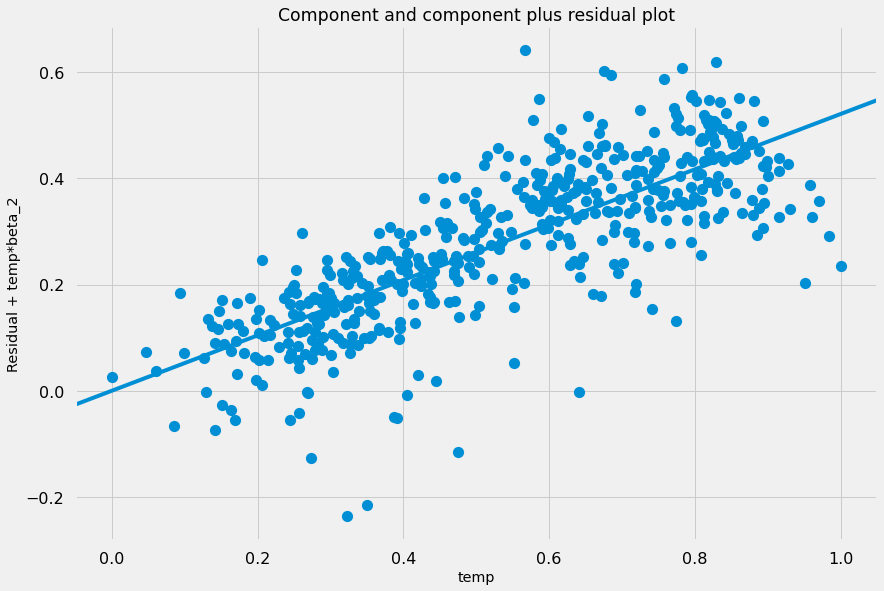

In [81]:
sm.graphics.plot_ccpr(lm_6, 'temp')
plt.show()

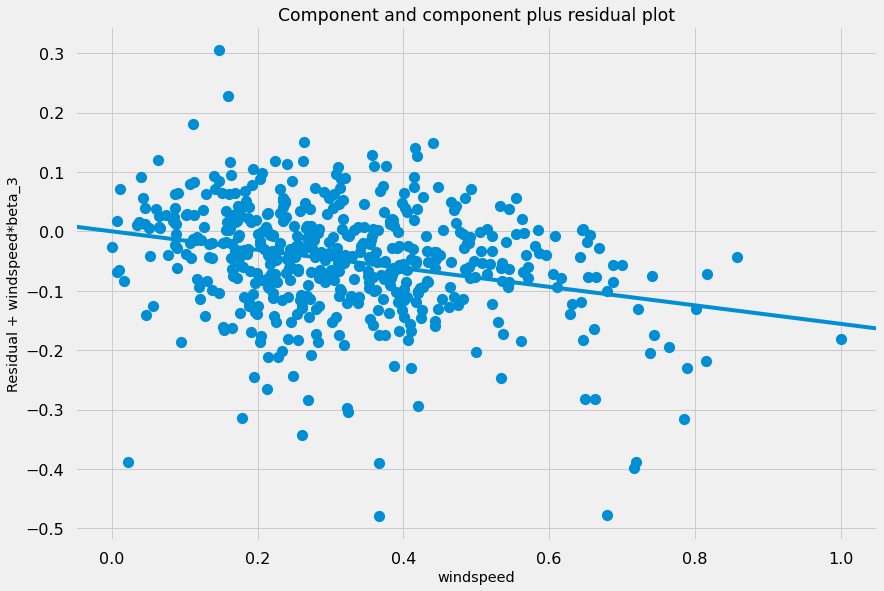

In [82]:
sm.graphics.plot_ccpr(lm_4, 'windspeed')
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
            <b>Insight: </b><br>The above plots represents the relationship between the model and the predictor variables. As we can see, linearity is well preserved
    </span>
</div>


In [83]:
# Select final variables from the test dataset
X_train_res = X_train[var_final]

In [84]:
#Add constant
X_train_res = sm.add_constant(X_train_res)

# predict train set
y_train_pred = lm_final.predict(X_train_res)


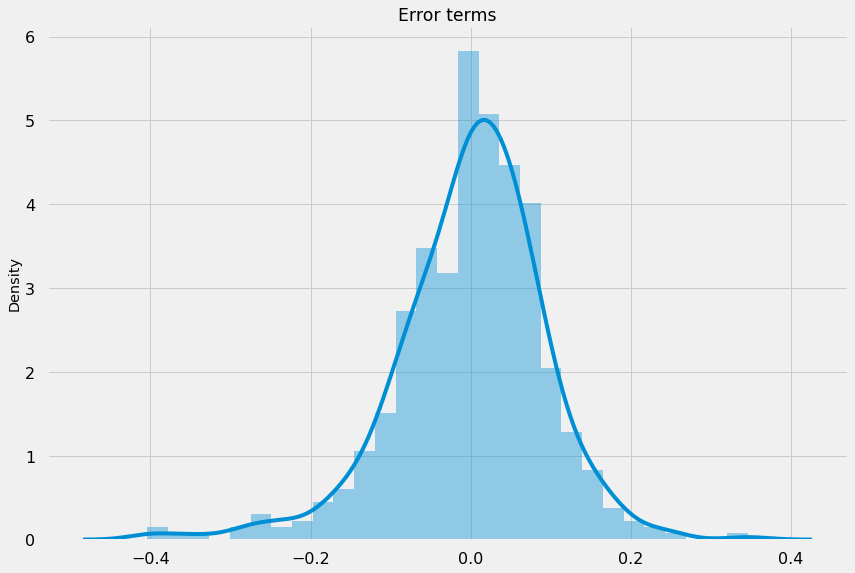

In [85]:
# distrubition plot for residuals
res = y_train - y_train_pred
sns.distplot(res)
plt.title('Error terms')
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
            <b>Insight: </b><br> Above histogram clearly explains the residuals/errors are normally distribited. 
    </span>
</div>

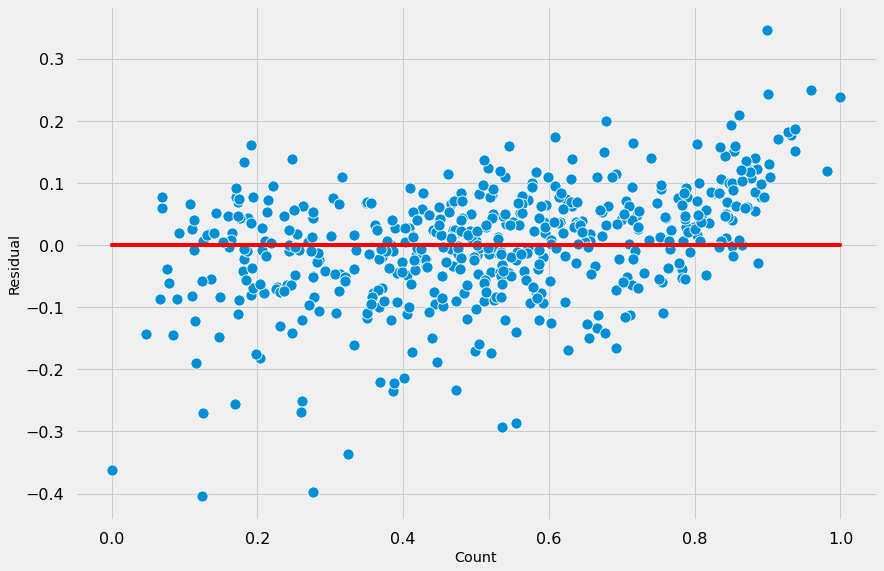

In [86]:
residual = y_train - y_train_pred
sns.scatterplot(y_train,res)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
            <b>Insight: </b><br> The residuals around the 0 line. This suggests that the assumption that the relationship is linear is reasonable.<br>
The residuals roughly form around the 0 line. This suggests that the variances of the error terms are equal.
    </span>
</div>

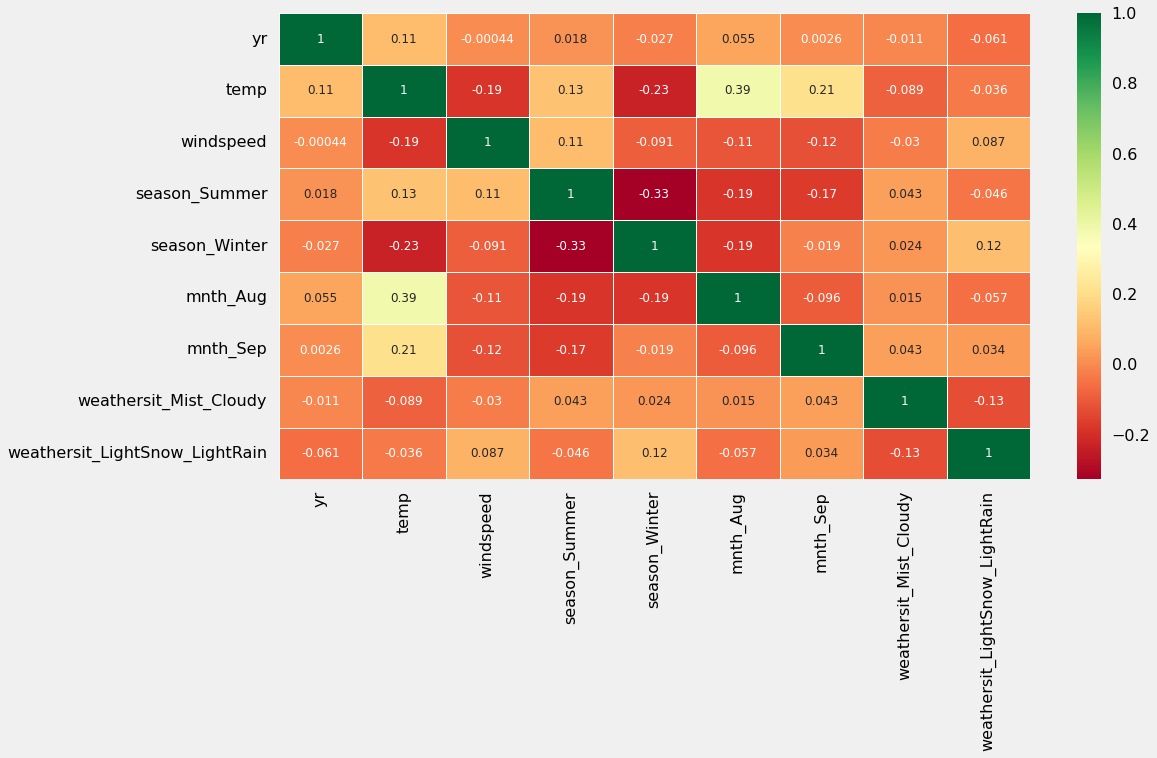

In [87]:
# Validating Multi Colinearity
X_train_new = X_train_res.drop(['const'], axis = 1)
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

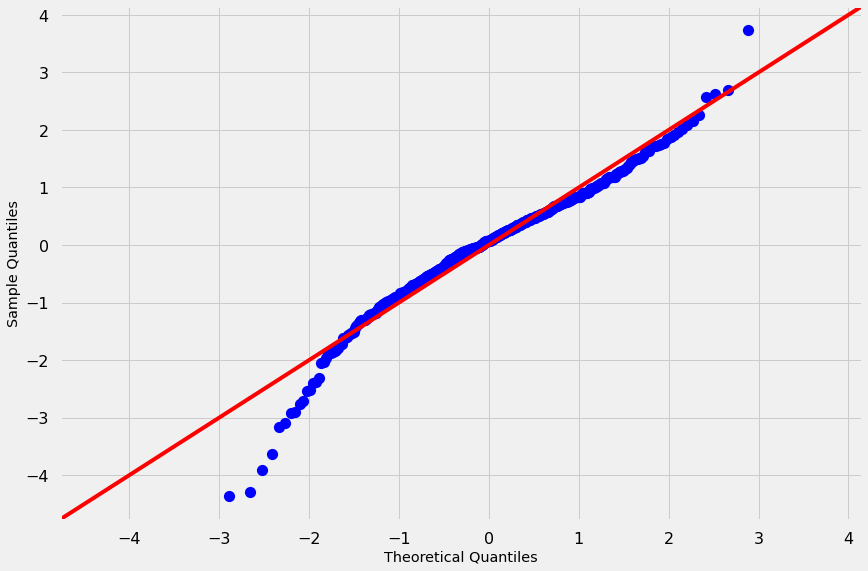

In [88]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
            <b>Insight: </b><br> This is a classic example of what a normal probability plot looks like when the residuals are normally distributed, but there is just very less outliers. The relationship is approximately linear with the exception of the one data point. We could proceed with the assumption that the error terms are normally distributed upon removing the outlier from the data set.
    </span>
</div>

<a id="stdval"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             7.4 Model Evaluation on Test set
            </span>   
        </font>    
</h3>

In [89]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Summer,season_Fall,season_Winter,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,mnth_ Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [90]:
X_test.shape

(220, 30)

In [91]:
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

In [92]:
y_test_new = X_test.pop('cnt')
#X_test = bike_test

In [93]:
y_test_new

184    0.704300
535    0.725421
299    0.278853
221    0.545512
152    0.569148
404    0.426075
198    0.505029
171    0.552426
512    0.704300
200    0.489188
509    0.791174
559    0.820719
109    0.440407
467    0.748931
339    0.270681
589    0.809907
222    0.547020
40     0.137918
682    0.635404
453    0.630878
606    0.914257
265    0.245663
510    0.766281
19     0.186824
117    0.454740
423    0.493085
614    0.887981
163    0.575685
630    0.938647
191    0.458260
572    0.812547
662    0.869751
264    0.547398
625    0.456626
325    0.146593
114    0.456626
218    0.420417
678    0.766281
24     0.194116
432    0.518984
395    0.511441
48     0.312547
684    0.660925
203    0.357556
450    0.585994
538    0.882198
73     0.203042
269    0.462535
710    0.613276
98     0.253206
530    0.908222
173    0.546769
418    0.580966
503    0.987302
727    0.113151
550    0.729193
714    0.420543
448    0.572668
248    0.285265
685    0.652250
410    0.468695
201    0.420292
41     0

In [94]:
# select final variables from X_test

X_test_sm = X_test[var_final]
X_test_sm.head()


,yr,temp,windspeed,season_Summer,season_Winter,mnth_Aug,mnth_Sep,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
184,0,0.837241,0.149393,0,0,0,0,1,0
535,1,0.911423,0.231142,1,0,0,0,0,0
299,0,0.496221,0.443398,0,1,0,0,1,0
221,0,0.890387,0.449707,0,0,1,0,0,0
152,0,0.821739,0.682387,1,0,0,0,0,0


In [95]:
# add constant
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,yr,temp,windspeed,season_Summer,season_Winter,mnth_Aug,mnth_Sep,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
184,1.0,0,0.837241,0.149393,0,0,0,0,1,0
535,1.0,1,0.911423,0.231142,1,0,0,0,0,0
299,1.0,0,0.496221,0.443398,0,1,0,0,1,0
221,1.0,0,0.890387,0.449707,0,0,1,0,0,0
152,1.0,0,0.821739,0.682387,1,0,0,0,0,0


In [96]:
# predict test dataset
y_test_pred = lm_final.predict(X_test_sm)

In [97]:
# print R-Squared from test dataset
r2_test = r2_score(y_true = y_test_new, y_pred = y_test_pred)
print('R-Squared for Test dataset: ', round(r2_test,3))

R-Squared for Test dataset:  0.782


In [98]:
import math
from math import sqrt
RMSE = round(sqrt(mean_squared_error(y_test_new, y_test_pred)),3)
MAE = round(mean_absolute_error(y_test_new, y_test_pred),)
print('RMSE : ', RMSE)
print('MAE : ', MAE)

RMSE :  0.112
MAE :  0


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
            <b>Insight: </b><br> The Root Mean Squared Error value for the test dataset based on final model is 0.112 and Mean Absolute Error is 0.087, which indicates that the model is really good.
    </span>
</div>

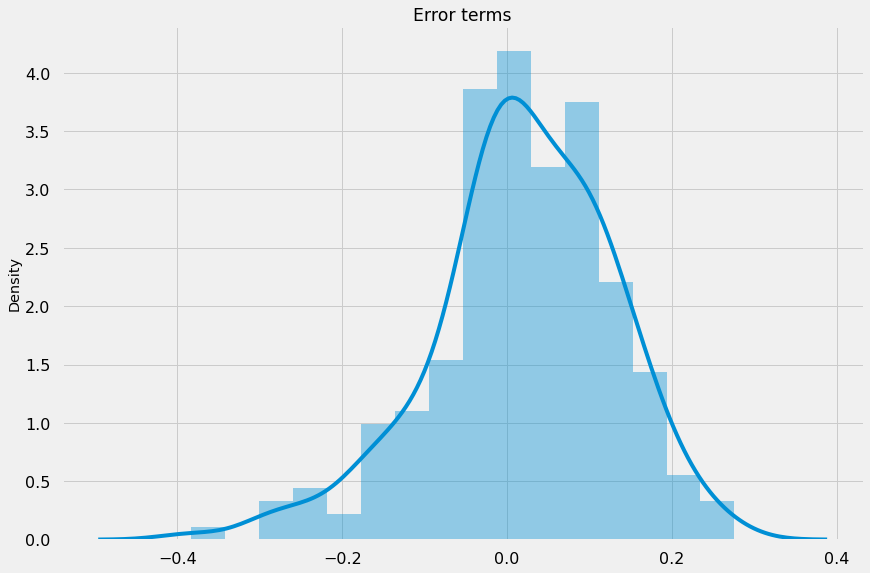

In [99]:
# distrubition plot for residue
test_res = y_test_new - y_test_pred
sns.distplot(test_res)
plt.title('Error terms')
plt.show()

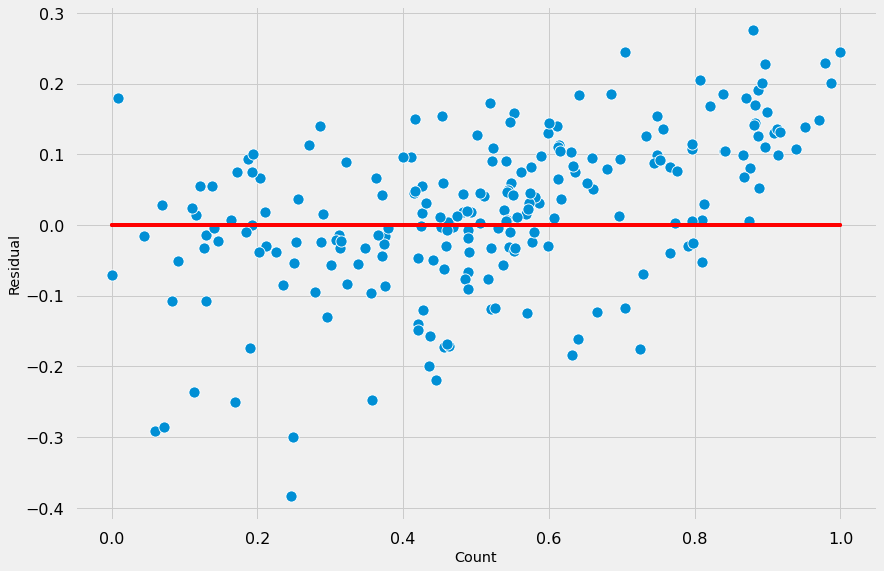

In [100]:
test_res = y_test_new - y_test_pred
sns.scatterplot(y_test_new,test_res)
plt.plot(y_test_new,(y_test_new - y_test_new), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Text(0, 0.5, 'y_pred')

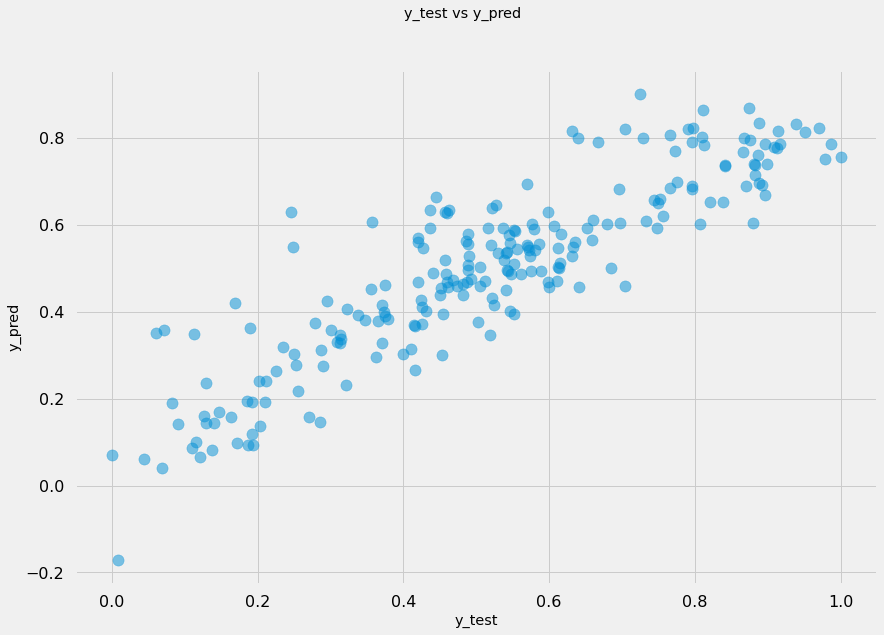

In [101]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test_new, y_test_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 

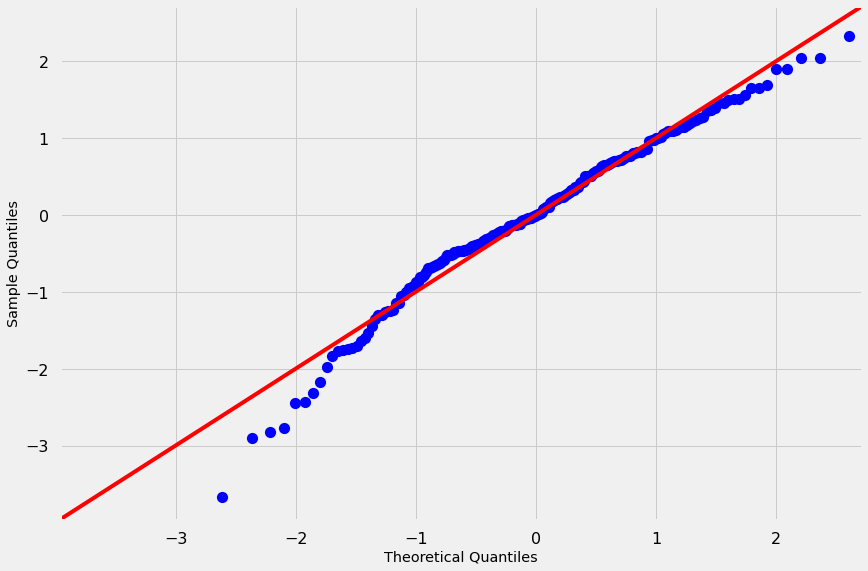

In [102]:
sm.qqplot((y_test_new - y_test_pred), fit=True, line='45')
plt.show()

<span style='font-family:Georgia'>
<h2>   
      <font color = green >
            Model Outcome Summary        
        </font>    
</h2>
</span>
<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <p><b>As per the final model, the top 3 predictor variables that influences bike booking are: </b></p><hr>
        <ol>
            <li><b>Temperature (Temp)</b><br> A coefficient value of ‘0.521’ indicated that a temperature has significant impact on bike rentals </li>
            <li><b>Light Rain & Snow (weathersit =3)</b><br>A coefficient value of ‘-0.278’ indicated that the light snow and rain deters people from renting out bikes</li>
            <li><b> Year (yr) </b><br>A coefficient value of ‘0.233’ indicated that a year wise the rental numbers are increasing</li>
        </ol>
<hr>
<p>It is recommended to give utmost importance to these three variables while planning to achieve maximum bike rental booking.<br>
    As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals. 
        </p>
     </span> 
</div>